In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import warnings
warnings.filterwarnings('ignore')

# row 생략 없이 출력
pd.set_option('display.max_rows', None)

# col 생략 없이 출력
pd.set_option('display.max_columns', None)

all_data_old = pd.read_csv('pdde_copu_lpay_data.csv')
all_data=pd.read_csv('all_data.csv')
demo_12 = pd.read_csv("demo_12.csv")

pdde = pd.read_csv("E:/Kaggle_Practice/LotteMembers/LPOINT_BIG_COMP_02_PDDE.csv")
copu = pd.read_csv("E:/Kaggle_Practice/LotteMembers/LPOINT_BIG_COMP_03_COP_U.csv")
pdclac = pd.read_csv("E:/Kaggle_Practice/LotteMembers/LPOINT_BIG_COMP_04_PD_CLAC.csv")
br = pd.read_csv("E:/Kaggle_Practice/LotteMembers/LPOINT_BIG_COMP_05_BR.csv")
lpay = pd.read_csv("E:/Kaggle_Practice/LotteMembers/LPOINT_BIG_COMP_06_LPAY.csv")

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report,roc_auc_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

In [3]:
demo_12.isnull().sum()

cust               0
ma_fem_dv          0
ages               0
zon_hlv            0
Spent              0
Frequency          0
OnNum              0
OffNum             0
AssoNum            0
LpayNum            0
Duration           0
ChildYes           0
CarYes             0
SmokeYes           0
PetYes             0
NumOfProduct       0
AvgProductOfBkt    0
AvgBktAmt          0
StoreVstNum        0
Lpay               0
Shop_day           0
dtype: int64

In [4]:
demo_13 = demo_12.copy()

In [5]:
demo_13 = demo_13.drop('cust',axis=1)
demo_13.head()

,ma_fem_dv,ages,zon_hlv,Spent,Frequency,OnNum,OffNum,AssoNum,LpayNum,Duration,ChildYes,CarYes,SmokeYes,PetYes,NumOfProduct,AvgProductOfBkt,AvgBktAmt,StoreVstNum,Lpay,Shop_day
0,여성,40대,Z07,658020,13,0,13,1,0,341,0,0,0,1,37,4.0,50616.92,5.0,0,0
1,여성,30대,Z12,46000,1,1,0,1,0,1,0,0,0,0,0,0.0,46000.00,1.0,0,3
2,여성,30대,Z11,28748531,89,9,80,15,4,360,1,0,0,0,59,1.0,323017.20,5.0,1,4
3,여성,50대,Z17,53120,5,0,5,0,0,126,0,0,0,0,19,4.0,10624.00,3.0,0,0
4,여성,40대,Z17,2253900,88,0,88,10,0,304,0,0,0,0,61,2.0,25612.50,8.0,0,2


In [6]:
temp=demo_13[['Lpay','ma_fem_dv', 'ages', 'zon_hlv', 'Spent', 'Frequency', 'OnNum', 'OffNum',
       'AssoNum', 'Duration','NumOfProduct', 'AvgBktAmt']]

In [7]:
temp = pd.get_dummies(temp, columns =['ma_fem_dv', 'ages', 'zon_hlv'])

In [8]:
temp.columns

Index(['Lpay', 'Spent', 'Frequency', 'OnNum', 'OffNum', 'AssoNum', 'Duration',
       'NumOfProduct', 'AvgBktAmt', 'ma_fem_dv_남성', 'ma_fem_dv_여성', 'ages_20대',
       'ages_30대', 'ages_40대', 'ages_50대', 'ages_60대', 'ages_70대',
       'zon_hlv_Z01', 'zon_hlv_Z02', 'zon_hlv_Z03', 'zon_hlv_Z04',
       'zon_hlv_Z05', 'zon_hlv_Z06', 'zon_hlv_Z07', 'zon_hlv_Z08',
       'zon_hlv_Z09', 'zon_hlv_Z10', 'zon_hlv_Z11', 'zon_hlv_Z12',
       'zon_hlv_Z13', 'zon_hlv_Z14', 'zon_hlv_Z15', 'zon_hlv_Z16',
       'zon_hlv_Z17'],
      dtype='object')

In [9]:
cat_df = temp[['ma_fem_dv_남성', 'ma_fem_dv_여성', 'ages_20대',
       'ages_30대', 'ages_40대', 'ages_50대', 'ages_60대', 'ages_70대',
       'zon_hlv_Z01', 'zon_hlv_Z02', 'zon_hlv_Z03', 'zon_hlv_Z04',
       'zon_hlv_Z05', 'zon_hlv_Z06', 'zon_hlv_Z07', 'zon_hlv_Z08',
       'zon_hlv_Z09', 'zon_hlv_Z10', 'zon_hlv_Z11', 'zon_hlv_Z12',
       'zon_hlv_Z13', 'zon_hlv_Z14', 'zon_hlv_Z15', 'zon_hlv_Z16',
       'zon_hlv_Z17']]

In [10]:
y = temp["Lpay"]
X = temp.drop(["Lpay",'ma_fem_dv_남성', 'ma_fem_dv_여성', 'ages_20대',
       'ages_30대', 'ages_40대', 'ages_50대', 'ages_60대', 'ages_70대',
       'zon_hlv_Z01', 'zon_hlv_Z02', 'zon_hlv_Z03', 'zon_hlv_Z04',
       'zon_hlv_Z05', 'zon_hlv_Z06', 'zon_hlv_Z07', 'zon_hlv_Z08',
       'zon_hlv_Z09', 'zon_hlv_Z10', 'zon_hlv_Z11', 'zon_hlv_Z12',
       'zon_hlv_Z13', 'zon_hlv_Z14', 'zon_hlv_Z15', 'zon_hlv_Z16',
       'zon_hlv_Z17'], axis = 1)
cols = X.columns
index = X.index

In [11]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [12]:
X = pd.concat([X,cat_df], axis = 1)

In [13]:
print(X.shape, y.shape)

(29874, 33) (29874,)


In [14]:
# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=12345)

In [15]:
from imblearn.combine import SMOTETomek

smk = SMOTETomek()
# Oversample training  data
X_train, y_train = smk.fit_sample(X_train, y_train)

# Oversample validation data
X_test, y_test = smk.fit_sample(X_test, y_test)

In [16]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))


print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 16435
Before OverSampling, counts of label '0': 16435 

After OverSampling, the shape of train_X: (32870, 33)
After OverSampling, the shape of train_y: (32870,) 

After OverSampling, counts of label '1': 16435
After OverSampling, counts of label '0': 16435


In [17]:
models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))
models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))

# evaluate each model in turn
results = []
names = []

In [18]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)

LR: (0.899350)
KNN: (0.866723)
CART: (0.885023)
RF: (0.908500)
SVM: (0.896220)
XGB: (0.913075)
LightGBM: (0.925114)
CatBoost: (0.931856)


In [19]:
models2 = []
models2.append(('CART', DecisionTreeClassifier( random_state = 12345)))
models2.append(('RF', RandomForestClassifier( random_state = 12345)))
models2.append(('XGB', GradientBoostingClassifier( random_state = 12345)))
models2.append(("LightGBM", LGBMClassifier( random_state = 12345)))
models2.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False)))

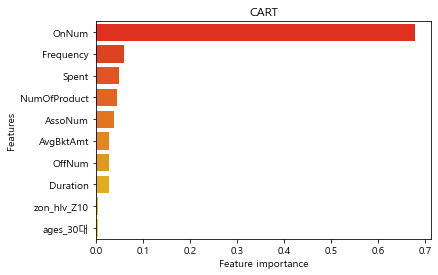

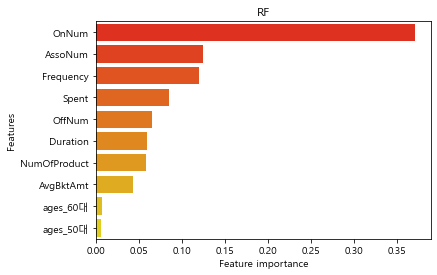

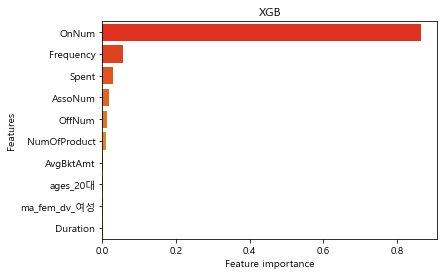

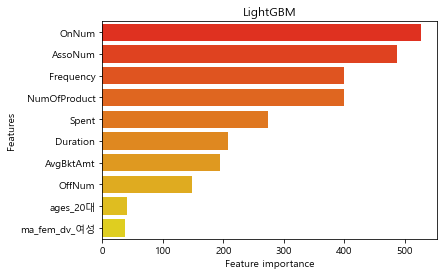

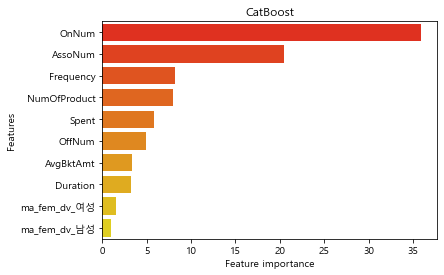

In [20]:
font_path = "C:/Users/katenam/AppData/Local/Microsoft/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False).head(10)

        sns.barplot(x=feature_imp, y=feature_imp.index,palette = 'autumn')
        plt.xlabel('Feature importance')
        plt.ylabel('Features')
        plt.title(name)
        plt.show()

In [23]:
# Hyperparameters have previously been obtained with the help of GridSearchCV.
models = []
models.append(("RF",RandomForestClassifier(random_state =12345, n_estimators=100,criterion='gini')))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345,learning_rate = 0.05, max_depth = 5, min_samples_split = 2, n_estimators = 500, subsample = 0.8)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345,  learning_rate = 0.05, max_depth = 3, n_estimators = 10000)))
models.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False, depth = 10, iterations = 1000, l2_leaf_reg = 5, learning_rate = 0.01)))


# evaluate each model in turn
results = []
names = []

for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        msg = "%s: (%f)" % (name, accuracy)
        print(msg)

RF: (0.908500)
XGB: (0.927522)
LightGBM: (0.931495)
CatBoost: (0.924874)


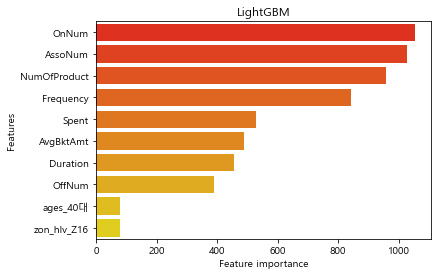

In [32]:
models2 = []
models2.append(("LightGBM", LGBMClassifier(random_state = 12345,  learning_rate = 0.05, max_depth = 3, n_estimators = 10000)))

# evaluate each model in turn
results = []
names = []

for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False).head(10)

        sns.barplot(x=feature_imp, y=feature_imp.index,palette = 'autumn')
        plt.xlabel('Feature importance')
        plt.ylabel('Features')
        plt.title(name)
        plt.show()

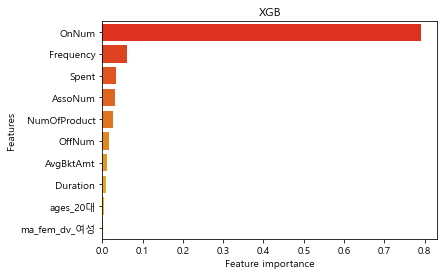

In [33]:
models2 = []
models2.append(("RF",RandomForestClassifier(random_state =12345, n_estimators=100,criterion='gini')))

# evaluate each model in turn
results = []
names = []

for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False).head(10)

        sns.barplot(x=feature_imp, y=feature_imp.index,palette = 'autumn')
        plt.xlabel('Feature importance')
        plt.ylabel('Features')
        plt.title(name)
        plt.show()

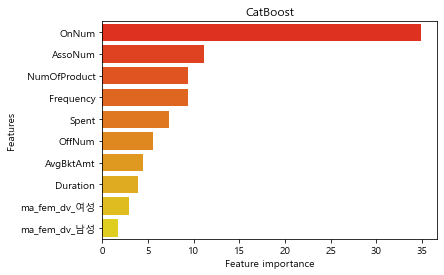

In [34]:
models2 = []
models2.append(("CatBoost", CatBoostClassifier(random_state = 12345, verbose = False, depth = 10, iterations = 1000, l2_leaf_reg = 5, learning_rate = 0.01)))

# evaluate each model in turn
results = []
names = []

for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False).head(10)

        sns.barplot(x=feature_imp, y=feature_imp.index,palette = 'autumn')
        plt.xlabel('Feature importance')
        plt.ylabel('Features')
        plt.title(name)
        plt.show()

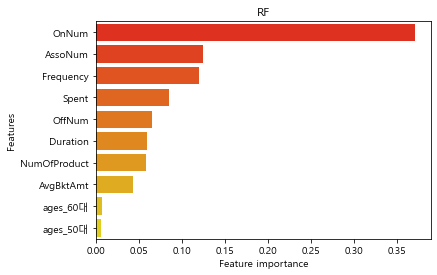

In [24]:
models2 = []
models2.append(("RF",RandomForestClassifier(random_state =12345, n_estimators=100,criterion='gini')))

# evaluate each model in turn
results = []
names = []

for name, model in models2:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False).head(10)

        sns.barplot(x=feature_imp, y=feature_imp.index,palette = 'autumn')
        plt.xlabel('Feature importance')
        plt.ylabel('Features')
        plt.title(name)
        plt.show()

In [27]:
y_pred = model.predict(X_test)
cm_xgb = confusion_matrix(y_test, y_pred=y_pred)

TP = cm_xgb[1, 1]
TN = cm_xgb[0, 0]
FP = cm_xgb[0, 1]
FN = cm_xgb[1, 0]

In [28]:
from matplotlib import rc,rcParams
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.rcParams.update({'font.size': 19})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontdict={'size':'16'})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=12,color="blue")
    plt.yticks(tick_marks, classes,fontsize=12,color="blue")
    rc('font', weight='bold')
    fmt = '.1f'
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red")

    plt.ylabel('True label',fontdict={'size':'16'})
    plt.xlabel('Predicted label',fontdict={'size':'16'})
    plt.tight_layout()

In [29]:
tn, fp, fn, tp = cm_xgb.ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  3894
False Positives:  259
False Negatives:  310
True Positives:  3843


In [31]:
df_pred = pd.DataFrame(data=[],columns=["y_test"])
df_pred["y_pred"] = y_pred
df_pred["y_test"] = y_test
df_pred.index = df_pred.index + 1
df_pred.head()

,y_test,y_pred
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0


In [32]:
FP_predicts_indexes = [] 
TP_predicts_indexes=[]
FN_predict_indexes =[]
TN_predicts_indexes  = []
for index, row in df_pred.iterrows():
    if row['y_test'] == 0 and row['y_pred'] == 1:
        FP_predicts_indexes.append(row.name)
    elif row['y_test'] == 1 and row['y_pred'] == 1:
        TP_predicts_indexes.append(row.name)
    elif row['y_test'] == 0 and row['y_pred'] == 0:
        TN_predicts_indexes.append(row.name)
    elif row['y_test'] == 1 and row['y_pred'] == 0:
        FN_predict_indexes.append(row.name) 

In [33]:
df_pred.loc[TN_predicts_indexes,"prediction_result"] = "TN"
df_pred.loc[TP_predicts_indexes,"prediction_result"] = "TP"
df_pred.loc[FP_predicts_indexes,"prediction_result"] = "FP"
df_pred.loc[FN_predict_indexes,"prediction_result"] = "FN"
df_pred.head()

,y_test,y_pred,prediction_result
1,0,0,TN
2,1,1,TP
3,0,0,TN
4,0,0,TN
5,0,0,TN


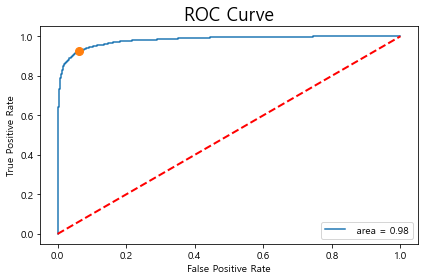

In [34]:
lbgm_tuned = model
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score
y_pred_prob = lbgm_tuned.predict_proba(X_test)[:,1]
fig, ax = plt.subplots()
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr,tpr)
ax.plot(fpr,tpr, label = " area = {:0.2f}".format(roc_auc))
ax.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax.set_xlabel("False Positive Rate", fontsize = 10)
ax.set_ylabel("True Positive Rate", fontsize = 10)
ax.set_title("ROC Curve", fontsize = 18)
ax.legend(loc = 'best')

close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()